In [ ]:
## 1 Dimension
intensityls = [ 0.00, 1.11,  2.22,  3.33,  4.44, 5.55,  6.66,  7.77,  8.88, 10.00]
pwrls = [3.0, 0.2498434742146487, 0.1093179309869848, 0.027676665992983643, 0.9178828370978961,
         1.8048858222406001, 1.9705953211199043, 0.8100098984786012, 1.2954634603980204,
         1.7230774906555866]

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import lagrange, CubicSpline # nak guna lagrage interpolation punya fx dengan spline method


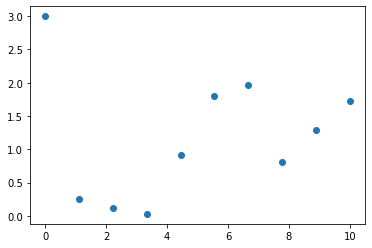

In [ ]:
plt.scatter(intensityls, pwrls)

In [ ]:
f_lag = lagrange(intensityls, pwrls)
f_cubspl = CubicSpline(intensityls, pwrls) # ni dia akan guna boundary condition yang default, 'not-a-knot'
f_cubspl_clamped = CubicSpline(intensityls, pwrls, bc_type = 'clamped') # guna bc clamped

In [ ]:
newxls = np.linspace(0, 10, 100)
newyls_lag = f_lag(newxls)
newyls_cubspl = f_cubspl(newxls)
newyls_cubspl_clamped = f_cubspl_clamped(newxls)

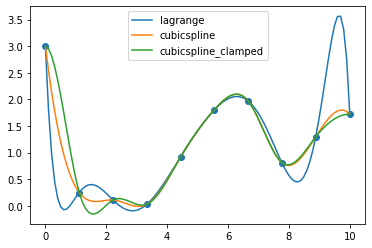

In [ ]:
plt.scatter(intensityls, pwrls)
plt.plot(newxls, newyls_lag, label='lagrange')
plt.plot(newxls, newyls_cubspl, label='cubicspline')
plt.plot(newxls, newyls_cubspl_clamped, label='cubicspline_clamped')
plt.legend()

at the few first and last points ada oscillation, ni yang kita tak sure, mungkin bukan yang sepatutnya jadi. compare dengan cubic splice method, takde oscillation

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
## 2 Dimension
xls = [-1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -0.5, -0.5, -0.5, -0.5,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]
yls = [0.0001, 0.125075, 0.25005, 0.375025, 0.5, 0.0001, 0.125075,
       0.25005, 0.375025, 0.5, 0.0001, 0.125075, 0.25005, 0.375025, 0.5, 0.0001,
       0.125075, 0.25005, 0.375025, 0.5, 0.0001, 0.125075, 0.25005, 0.375025, 0.5]
zls = [16.012, 20.9, -15.4371, -7.6362, -5.1, 12.0182, -10.8, -3.29041,
       -1.77995, -1.1368, 0.60, 0.6031, 0.612, 0.6295, 0.6545, 3.994, 1.7389,
       1.3015, 1.131, 1.056, 0.0004796, 0.30087, 0.40566, 0.4664, 0.5142]

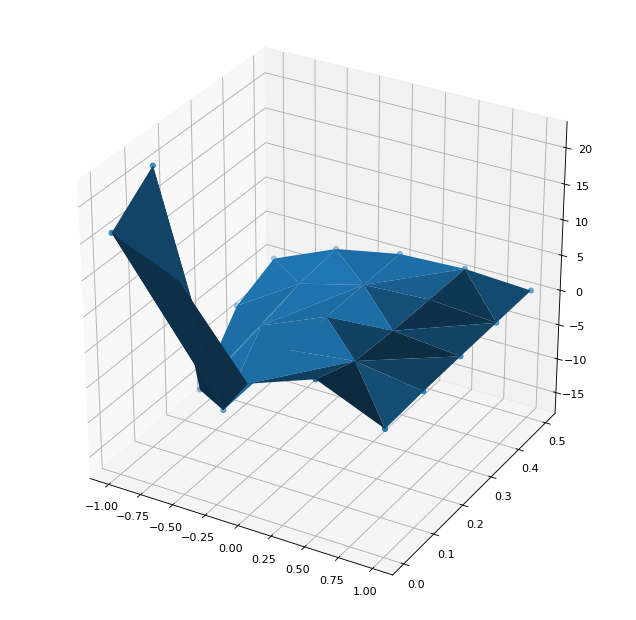

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xls, yls, zls)
ax.plot_trisurf(xls, yls, zls)

tak smooth ah en, so nak smooth kan dia boleh guna fx approximation

In [ ]:
from scipy.interpolate import interp2d #interpolate in 2d

In [ ]:
f_inter = interp2d(xls, yls, zls)

In [ ]:
resolution = 100
new_x = np.linspace(-1.0, 1.0, resolution) #-1 to  ikut xls punya first val and last val
new_y = np.linspace(0.0001, 0.5, resolution)
new_z = f_inter(new_x, new_y)

In [ ]:
xmesh, ymesh = np.meshgrid(new_x, new_y)

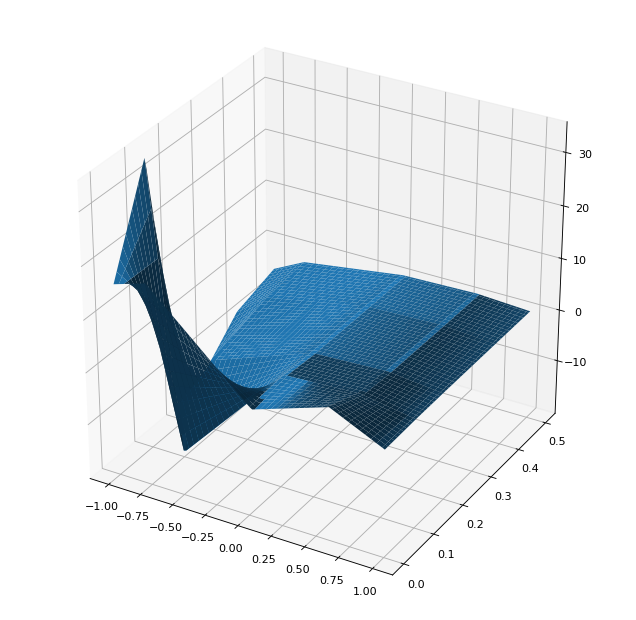

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmesh, ymesh, new_z)

resolution dah naik, tapi masih edgy, sebabbb dia linear interpolation


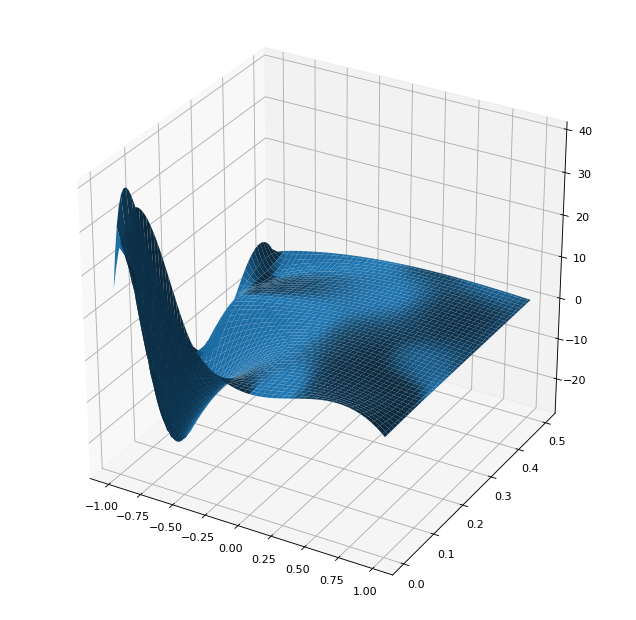

In [ ]:
f_inter_cubic = interp2d(xls, yls, zls, kind='cubic') #nak tukar cara interpolate
resolution = 100
new_x_cubic = np.linspace(-1.0, 1.0, resolution) #-1 to  ikut xls punya first val and last val
new_y_cubic = np.linspace(0.0001, 0.5, resolution)
new_z_cubic = f_inter_cubic(new_x_cubic, new_y_cubic)
xmesh_cubic, ymesh_cubic = np.meshgrid(new_x_cubic, new_y_cubic)
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xmesh_cubic, ymesh_cubic, new_z_cubic)

haaa kan dah cantik, curvy gituu

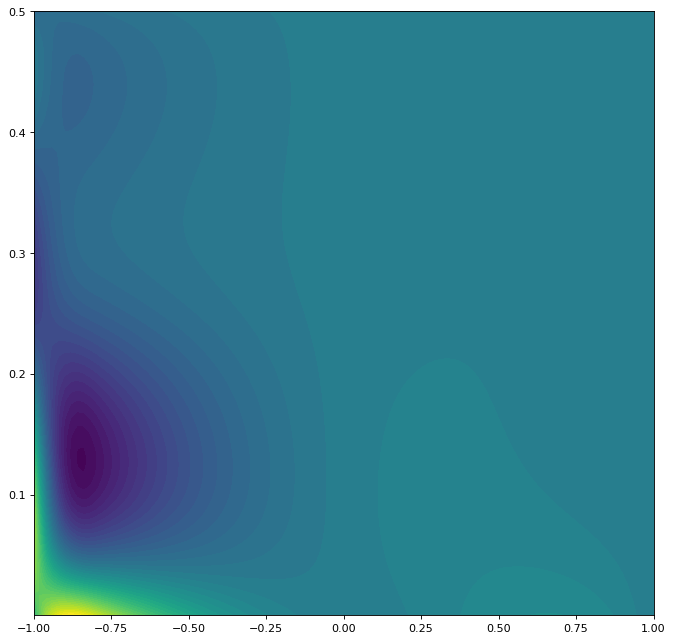

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=80)
ax = fig.add_subplot(111)
ax.contourf(xmesh_cubic, ymesh_cubic, new_z_cubic, levels=50)

nak buat in 2d, tengok dari atas. contour